In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

In [34]:
df = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\HR.xlsx")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [35]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
df["Attrition"]=lb1.fit_transform(df["Attrition"])
df["BusinessTravel"]=lb1.fit_transform(df["BusinessTravel"])
df["Department"]=lb1.fit_transform(df["Department"])
df["EducationField"]=lb1.fit_transform(df["EducationField"])
df["Gender"]=lb1.fit_transform(df["Gender"])
df["JobRole"]=lb1.fit_transform(df["JobRole"])
df["MaritalStatus"]=lb1.fit_transform(df["MaritalStatus"])
df["OverTime"]=lb1.fit_transform(df["OverTime"])

In [37]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred= knn.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7993197278911565

In [43]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[234  48]
 [ 11   1]]


234

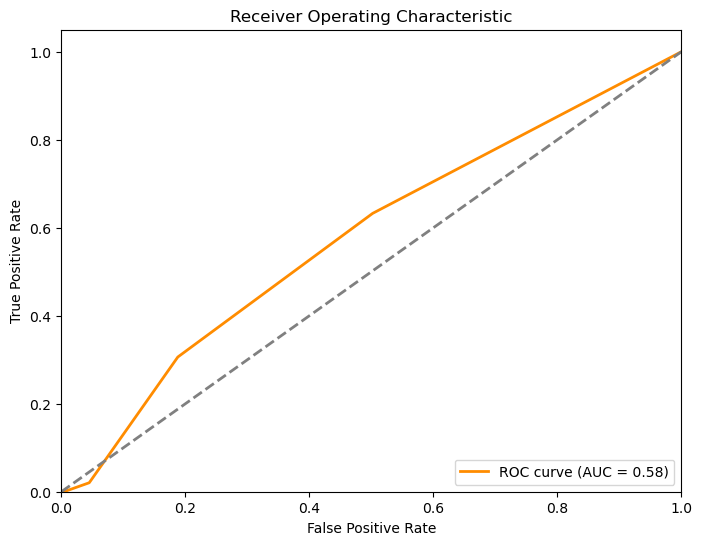

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = knn.predict_proba(X_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       245
           1       0.08      0.02      0.03        49

    accuracy                           0.80       294
   macro avg       0.46      0.49      0.46       294
weighted avg       0.71      0.80      0.75       294



array([[234,  48],
       [ 11,   1]], dtype=int64)

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7993197278911565

In [47]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[205  19]
 [ 40  30]]


205

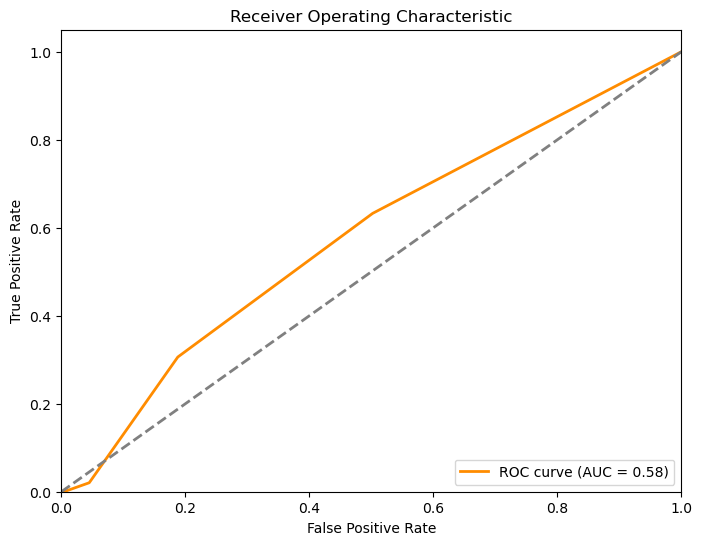

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = knn.predict_proba(X_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       245
           1       0.43      0.61      0.50        49

    accuracy                           0.80       294
   macro avg       0.67      0.72      0.69       294
weighted avg       0.83      0.80      0.81       294



array([[205,  19],
       [ 40,  30]], dtype=int64)

In [51]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8197278911564626

In [52]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[230  38]
 [ 15  11]]


230

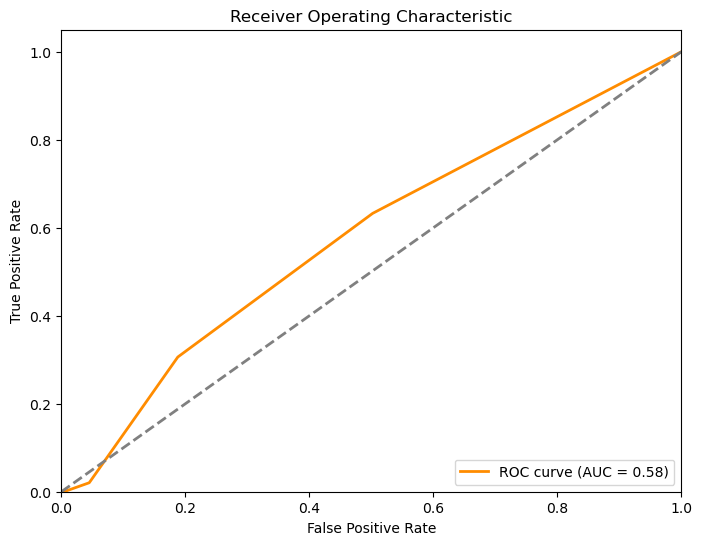

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = knn.predict_proba(X_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       245
           1       0.42      0.22      0.29        49

    accuracy                           0.82       294
   macro avg       0.64      0.58      0.60       294
weighted avg       0.79      0.82      0.80       294



array([[230,  38],
       [ 15,  11]], dtype=int64)

In [55]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5204081632653061

In [56]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[124  20]
 [121  29]]


124

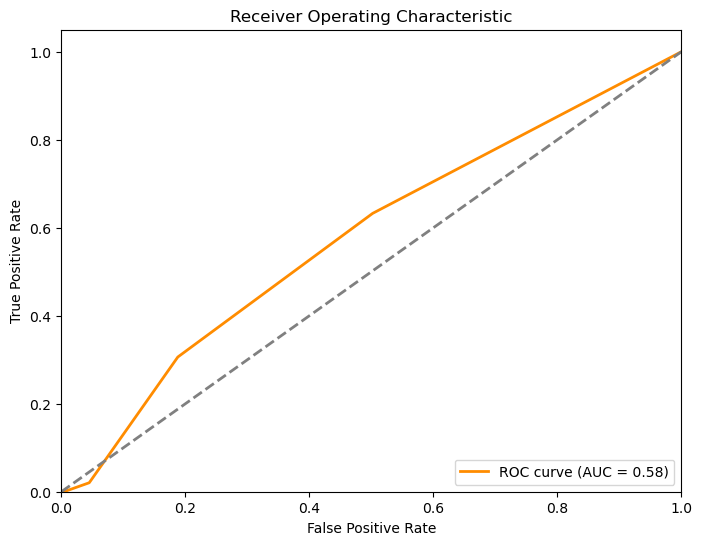

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = knn.predict_proba(X_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

           0       0.86      0.51      0.64       245
           1       0.19      0.59      0.29        49

    accuracy                           0.52       294
   macro avg       0.53      0.55      0.46       294
weighted avg       0.75      0.52      0.58       294



array([[124,  20],
       [121,  29]], dtype=int64)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7789115646258503

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[213,  32],
       [ 33,  16]], dtype=int64)

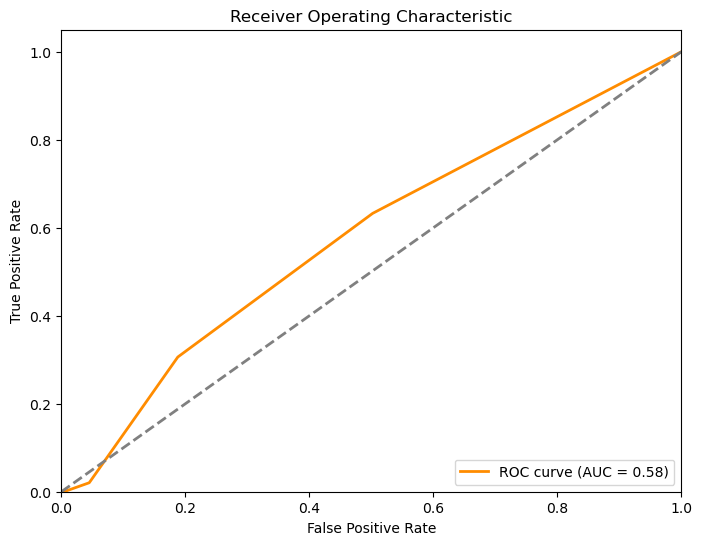

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = knn.predict_proba(X_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.33      0.33      0.33        49

    accuracy                           0.78       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.78      0.78       294



array([[124,  20],
       [121,  29]], dtype=int64)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters={"n_neighbors":[1,3,5,7,9,11,13,15,17,19]}
model=GridSearchCV(classifier,parameters)
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [64]:
model.best_params_

{'n_neighbors': 11}